In [405]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [407]:
df = pd.read_csv(r"C:\Users\Robin Bhardwaj\Downloads\car data.csv")

In [409]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [411]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [413]:
df.shape

(301, 9)

In [423]:
df[['Fuel_Type']].value_counts()

Fuel_Type
Petrol       239
Diesel        60
CNG            2
Name: count, dtype: int64

In [425]:
df[['Seller_Type']].value_counts()

Seller_Type
Dealer         195
Individual     106
Name: count, dtype: int64

In [427]:
df[['Transmission']].value_counts()

Transmission
Manual          261
Automatic        40
Name: count, dtype: int64

In [415]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [429]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


<Axes: xlabel='Selling_Price', ylabel='Count'>

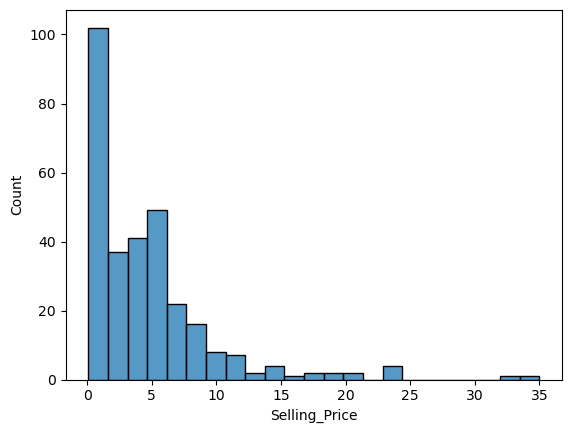

In [433]:
sns.histplot(data=df,x='Selling_Price')

In [435]:
df['car_age']=2025-df['Year']

In [437]:
df.drop(columns=['Year','Car_Name'],inplace = True)

In [439]:
df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'car_age'],
      dtype='object')

In [319]:
df['Selling_Price']= np.log1p(df['Selling_Price'])

<Axes: xlabel='Selling_Price', ylabel='Count'>

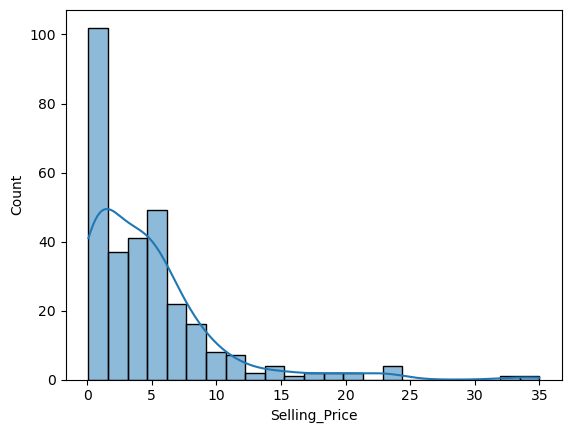

In [441]:
sns.histplot(data=df,x='Selling_Price',kde=True)

In [443]:
df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'car_age'],
      dtype='object')

In [445]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

# the independent variables set 
x = add_constant(df[['Present_Price', 'Kms_Driven',  'Owner', 'car_age']].dropna() )

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x.columns 

# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                          for i in range(len(x.columns))] 
  
print(vif_data)

         feature        VIF
0          const  19.535803
1  Present_Price   1.048554
2     Kms_Driven   1.442957
3          Owner   1.034358
4        car_age   1.422236


In [447]:
x=df_cleaned.drop(columns=['Selling_Price'])
y= df_cleaned['Selling_Price']

In [449]:
from sklearn.model_selection import train_test_split

In [451]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=42)

In [453]:
print(x_test.shape)

(60, 7)


In [455]:
print(x_train.shape)

(240, 7)


In [457]:
df_train = df[df.index.isin(x_train.index)]
df_train.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [459]:
df_test = df[df.index.isin(x_test.index)]
df_test.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
5,9.25,9.83,2071,Diesel,Dealer,Manual,0,7
7,6.50,8.61,33429,Diesel,Dealer,Manual,0,10
9,7.45,8.92,42367,Diesel,Dealer,Manual,0,10
17,7.75,10.79,43000,Diesel,Dealer,Manual,0,9
24,2.90,4.41,56879,Petrol,Dealer,Manual,0,12


In [503]:
import statsmodels.formula.api as smf
import numpy as np

In [527]:
lr_model = smf.ols(formula =  ' Selling_Price ~ Present_Price + Kms_Driven + C(Fuel_Type) + C(Seller_Type) + C(Transmission)  + car_age',data = df_train)

In [529]:
lr_model = lr_model.fit()

In [531]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     272.5
Date:                Thu, 06 Feb 2025   Prob (F-statistic):          4.04e-108
Time:                        09:37:10   Log-Likelihood:                -465.99
No. Observations:                 240   AIC:                             948.0
Df Residuals:                     232   BIC:                             975.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [533]:
infl = lr_model.get_influence()
cooks_distance = infl.summary_frame()['cooks_d']
cooks_distance

0      0.000175
1      0.006058
2      0.000014
3      0.000015
4      0.002981
         ...   
293    0.001456
294    0.000167
296    0.000380
298    0.000065
299    0.002742
Name: cooks_d, Length: 240, dtype: float64

In [535]:
cooks_distance[cooks_distance > 1]

86    6.551576
Name: cooks_d, dtype: float64

In [361]:
# Get indices of influential points (Cook's Distance > 1)
influential_points = np.where( cooks_distance > 1)[0]  # Get index positions

# Remove influential points
df_cleaned = df.drop(index=influential_points).reset_index(drop=True)

# Display new shape after removal
print(f"Original Data Shape: {df.shape}")
print(f"Cleaned Data Shape: {df_cleaned.shape}")

Original Data Shape: (301, 8)
Cleaned Data Shape: (300, 8)


In [537]:
from sklearn.metrics import r2_score

In [539]:
predictions = lr_model.predict(df_test)
print(r2_score(predictions,df_test['Selling_Price']))

0.7629195238486582


In [541]:
lr_model.predict(pd.DataFrame([[8.92,42367,'Diesel','Dealer','Manual',10]],columns=['Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'car_age']))

0    7.295518
dtype: float64